### Importando os dados

In [1]:
# !pip install pandas matplotlib seaborn plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('./data/imigrantes_canada.csv')

In [4]:
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

## Analisando as tendências de imigração para o Canadá para um determinado período

### Matplotlib

#### Definindo indice e nova coluna "anos"

In [6]:
#Definindo o país como indice para facilitar a pesquisa
df.set_index('País', inplace=True)

In [7]:
#Criando uma nova coluna com todos os períodos do dataset para facilitar a pesquisa pelo período determinado
anos = list(map(str, range(1980, 2014)))

In [8]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#### Análise do Brasil

In [9]:
#Filtrando o dataframe pelo 'Brasil' e todos os anos
brasil = df.loc['Brasil', anos]

#Transformando em dataframe
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [10]:
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


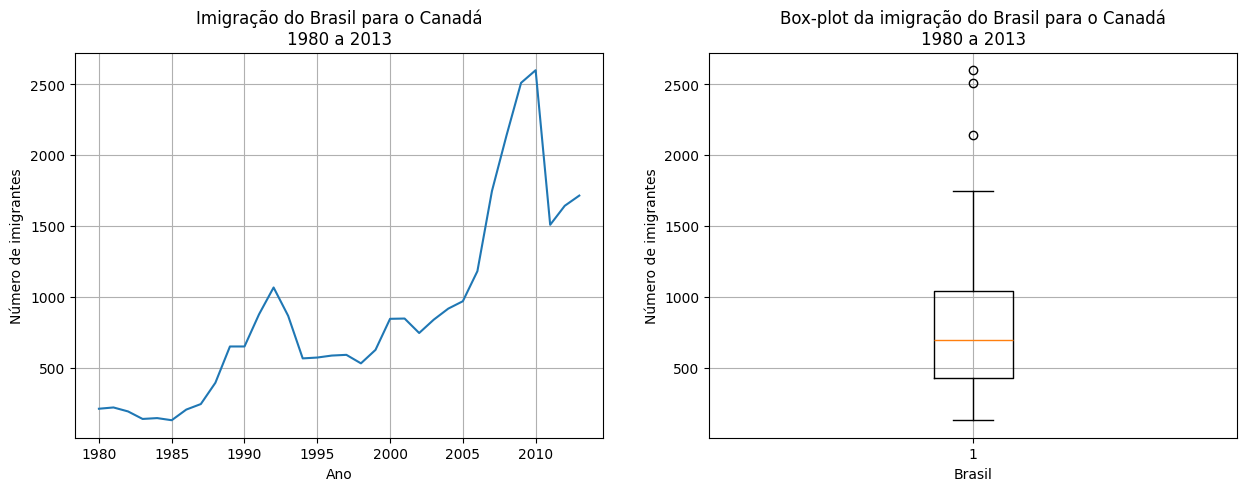

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Gráfico de linhas
axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid() 

# Boxplot
axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Box-plot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()

fig.savefig('graphs/matplotlib/imigracao_brasil.png', transparent=False, dpi=300, bbox_inches='tight')


plt.show()

#### Análise com Brasil, Colômbia, Argentina e Peru

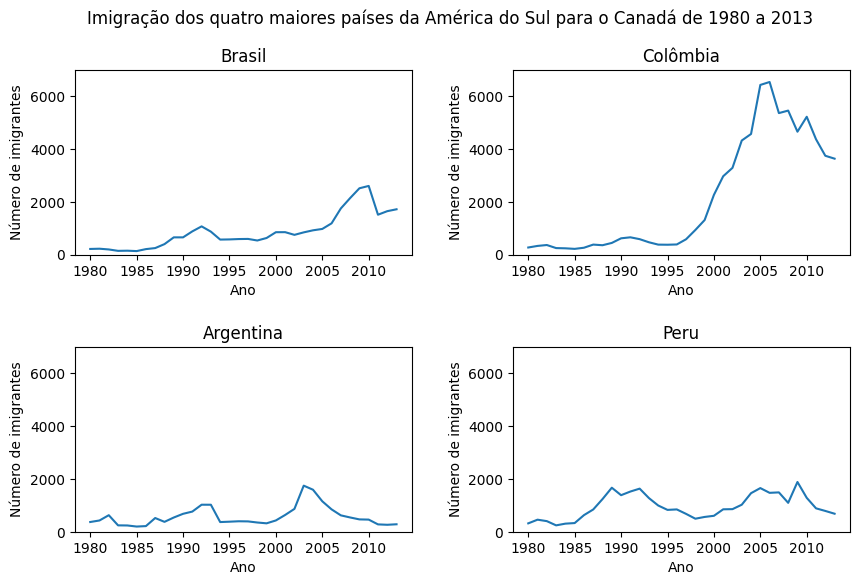

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Adicionando um título geral para os subplots
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

# Alterando a frequência dos ticks do eixo X em todos os subplots
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Adicionando rótulos para os eixos X e Y
for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

# Definindo a mesma escala no eixo Y em todos os subplots
ymin = 0
ymax = 7000
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

fig.savefig('graphs/matplotlib/imigracao_america_sul_top4.png', transparent=False, dpi=300, bbox_inches='tight')


plt.show()

##**Personalizando visualizações com Matplotlib**

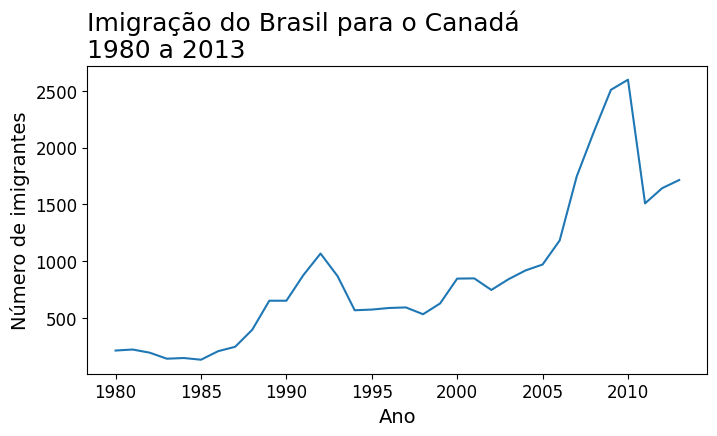

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

#### Análise com toda a américa do sul

In [14]:
america_sul = df.query('Região == "América do Sul"')

In [15]:
america_sul.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [16]:
# Ordenando em ordem decrescente
america_sul_sorted = america_sul.sort_values(by='Total', ascending=True)

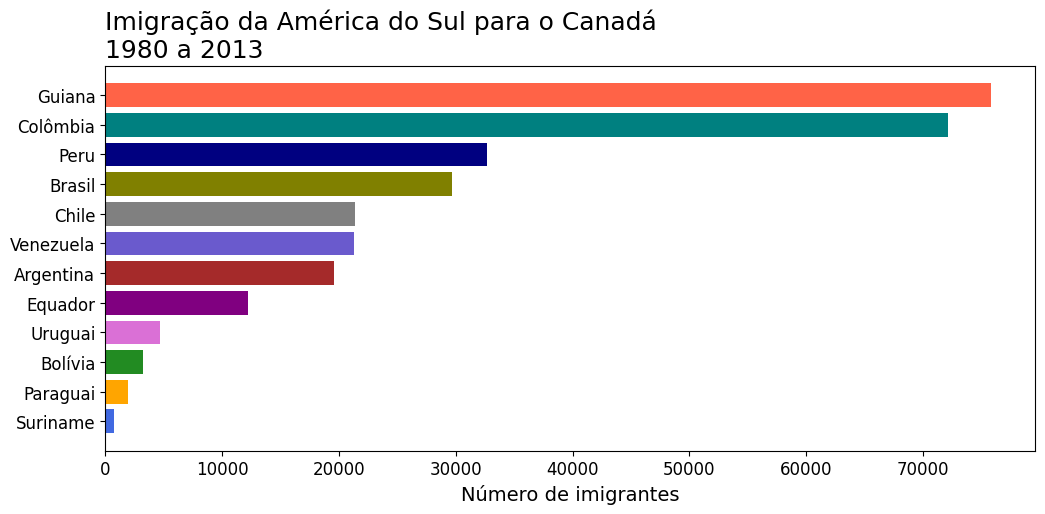

In [17]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

fig.savefig('graphs/matplotlib/imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

##### Destacando um país em especifico

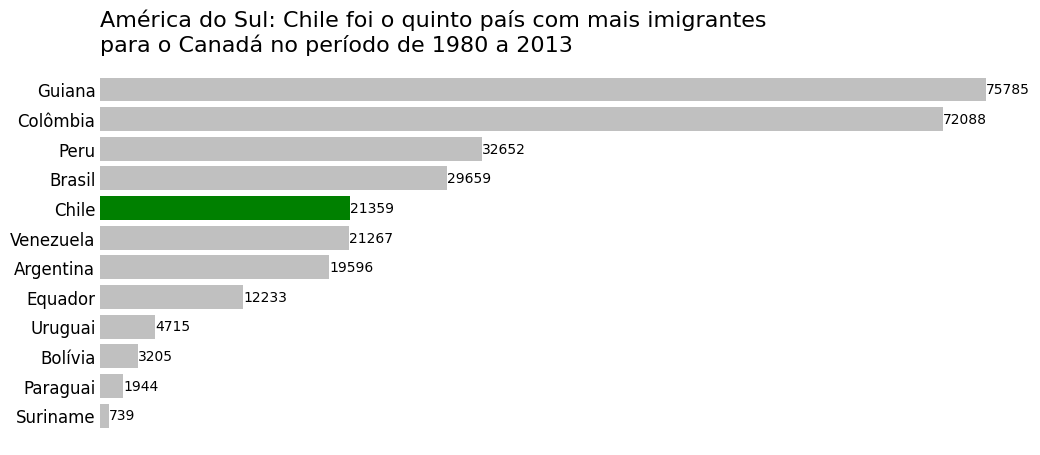

In [18]:
# Criando uma lista de cores para destacar o Chile
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Chile':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Chile foi o quinto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False) 

# Removendo todos os ticks dos eixos X e Y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

### Seaborn

In [19]:
#Definindo tema padrão
sns.set_theme()

In [20]:
# Filtrando o top 10 mundial
top_10 = df.sort_values(by='Total', ascending=False).head(10)

In [21]:
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


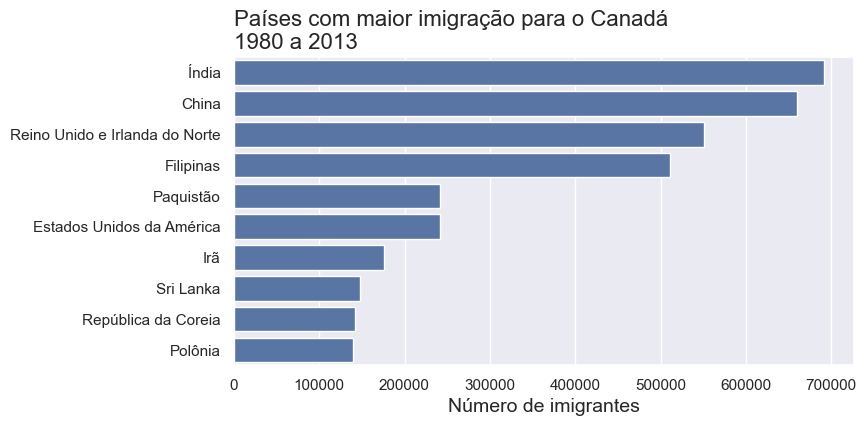

In [22]:
# Criando a figura
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

# Personalizando o gráfico
ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')

fig.savefig('graphs/seaborn/imigracao_paises.png', transparent=False, dpi=300, bbox_inches='tight')

# Exibindo o gráfico
plt.show()

#### Testando paletas

In [23]:
# Função para gerar gráfico de acordo com a paleta
def gerar_grafico_paleta(palette):
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette, hue=top_10.index, legend=False)
    ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
    ax.set_xlabel('Número de imigrantes', fontsize=14)
    ax.set_ylabel('')
    plt.show()


Cores sequenciais


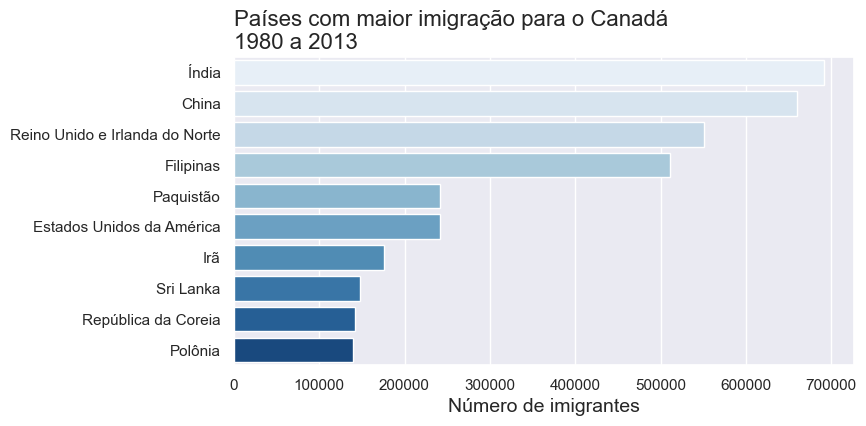

In [24]:
gerar_grafico_paleta('Blues')

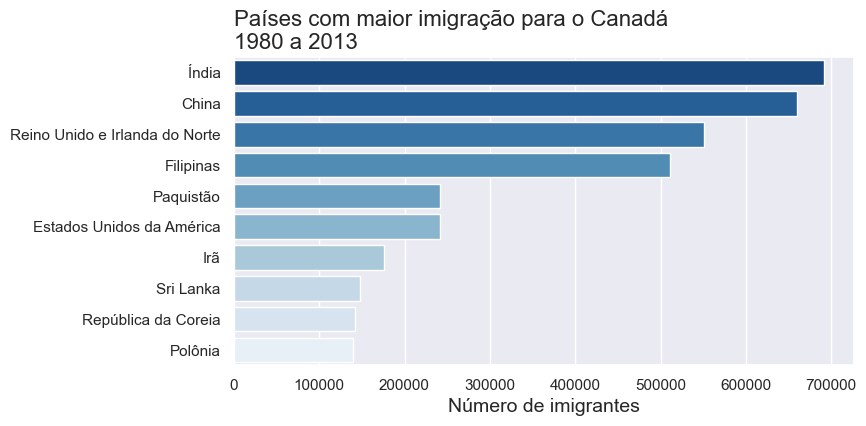

In [25]:
gerar_grafico_paleta('Blues_r')

Cores divergentes


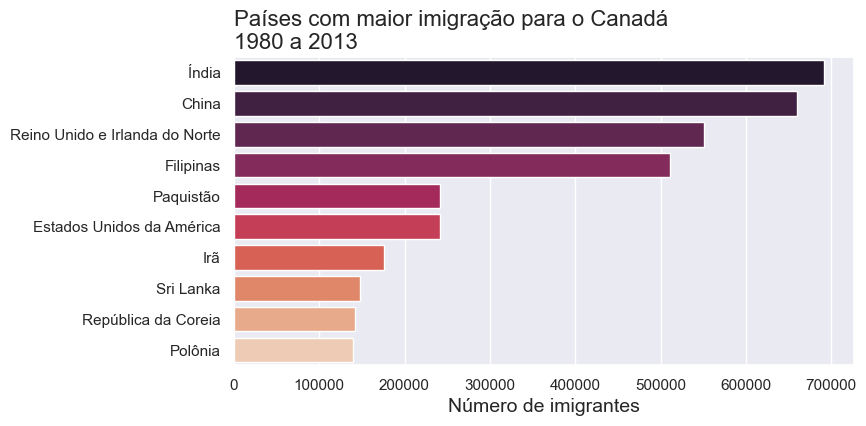

In [26]:
gerar_grafico_paleta('rocket')

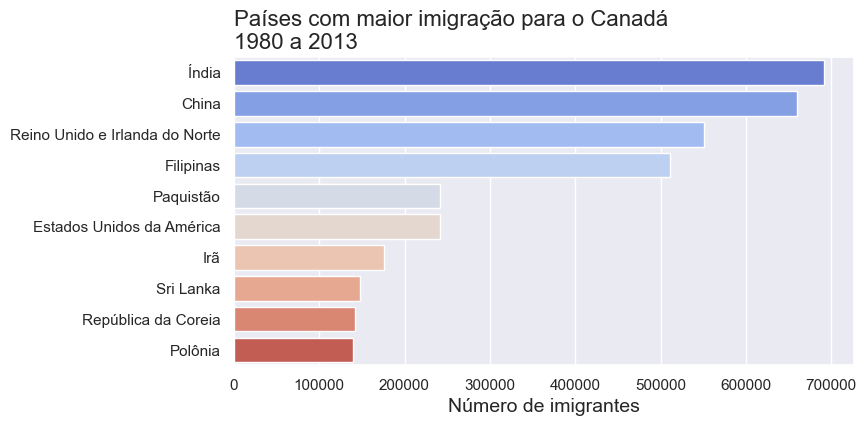

In [27]:
gerar_grafico_paleta('coolwarm')

Cores categóricas


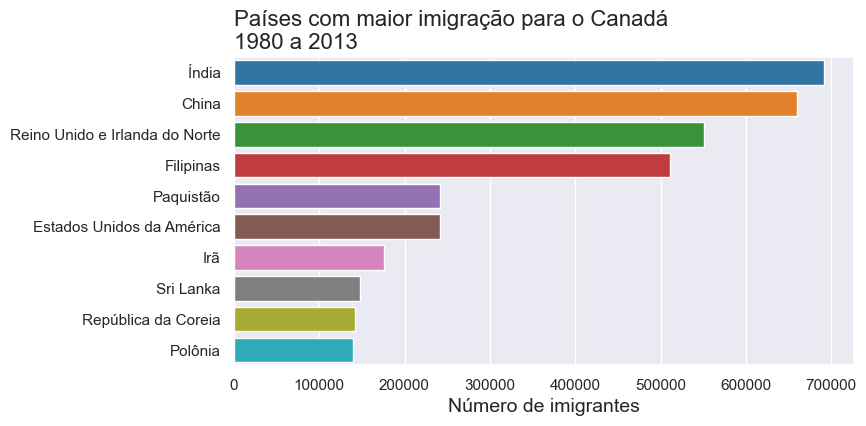

In [28]:
gerar_grafico_paleta('tab10')

#### Testando temas

Dark 

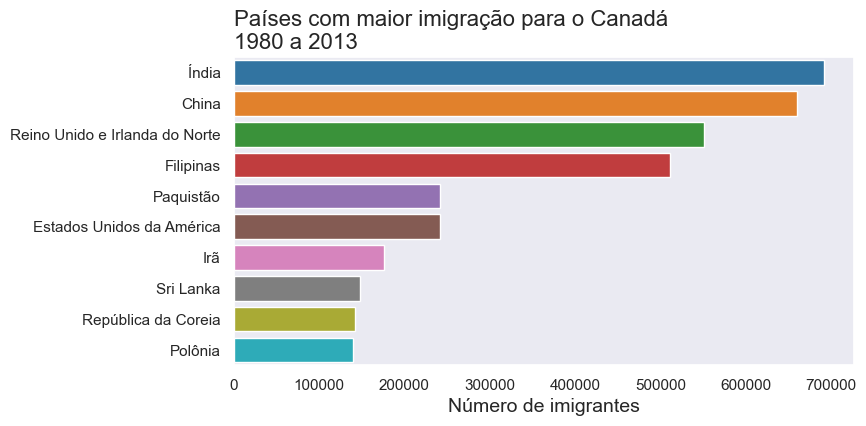

In [29]:
# Alterando o tema
sns.set_theme(style='dark')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

Whitegrid 

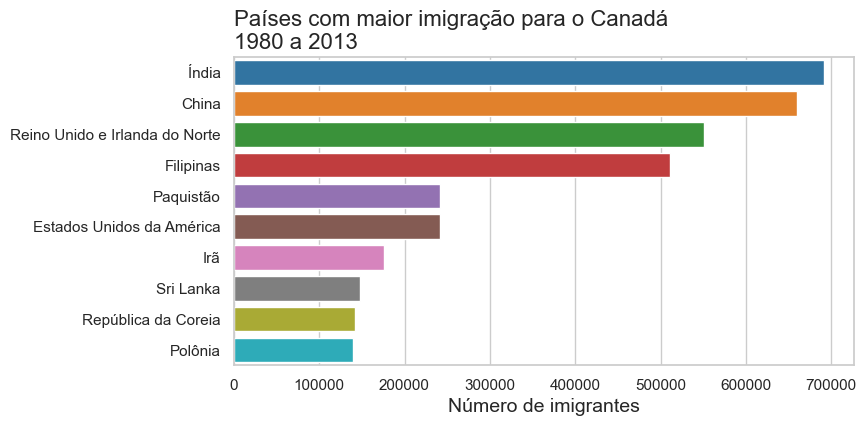

In [30]:
# Alterando o tema
sns.set_theme(style='whitegrid')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

White 

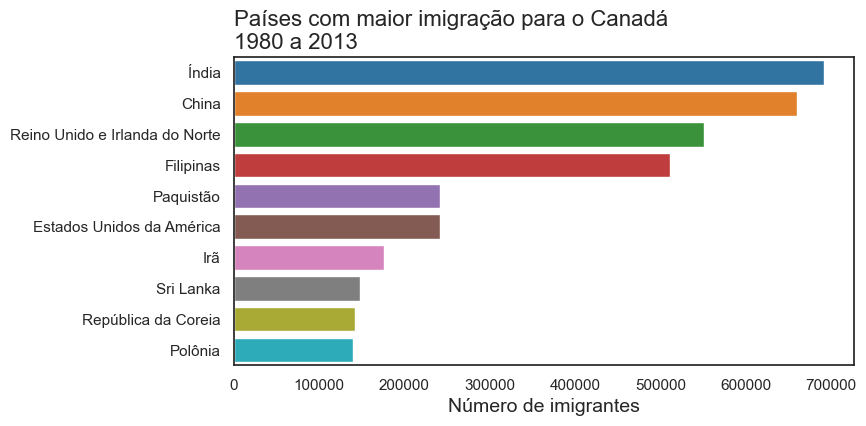

In [31]:
# Alterando o tema
sns.set_theme(style='white')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

Ticks 

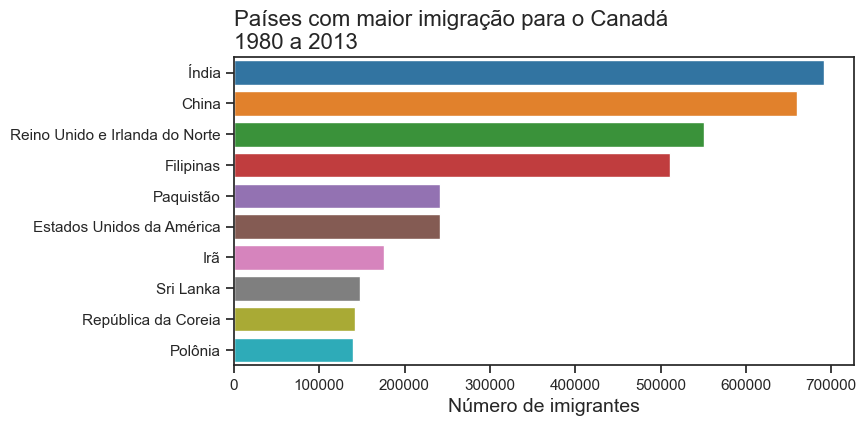

In [32]:
# Alterando o tema
sns.set_theme(style='ticks')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

#### Removendo frame e finalizando a versão final do gráfico

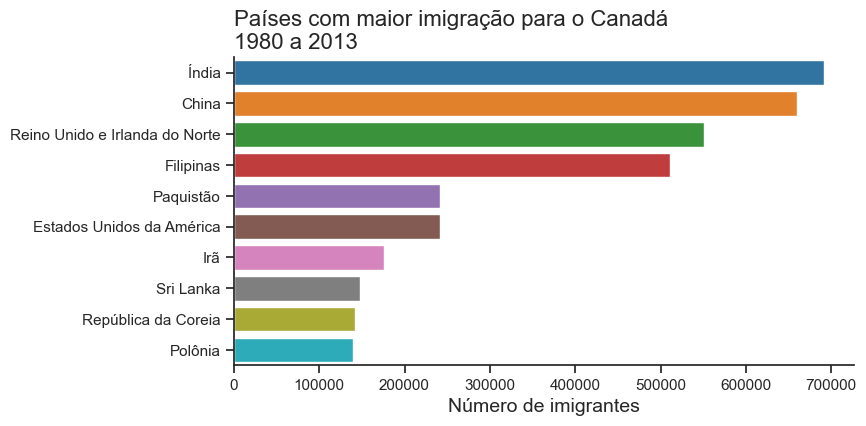

In [33]:
#Criando a figura
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10', hue=top_10.index, legend=False)

# Personalizando
ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
sns.despine()

fig.savefig('graphs/seaborn/imigracao_paises.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

### Plotly

#### Brasil

In [34]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013', markers=True)
fig.update_traces(line_color='blue', line_width=4)
fig.update_layout(
    width=1000, height=500, 
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.write_html('graphs/plotly/imigracao_brasil.html')
fig.show()

#### Europa

In [35]:
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [36]:
europa = df.query("Continente == 'Europa'")
df_europa_clean = europa.drop(['Continente', 'Região', 'Total'], axis=1)
europa_final = df_europa_clean.T

In [37]:
fig = px.line(europa_final, x=europa_final.index, y=europa_final.columns, color='País', markers=True,
              title='Imigração dos países da Europa para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.write_html('graphs/plotly/imigracao_europa.html')
fig.show()

#### América do sul

In [38]:
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T

In [39]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País', markers=True,
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.write_html('graphs/plotly/imigracao_america_sul.html')
fig.show()